In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import math
import os.path
from os import path
from tqdm import tqdm

In [2]:
gesture_list = [
        "NormalWalking",
        "TapOuward",
        "TapInFrontOfTheOtherFoot",
        "TapInward",
        "BigStep", 
        "SmallStep",
        "ToeTapBehind",
        "ToeTapInFront",
        "TapWithHeel",
        "TapWithFootRotatedOutwards",
        "TapWithFootRotatedInwards",
        "Click",
        "KickInward",
        "KickOutward",
        "KickForward",
        "LiftInFront",
        "BendingBehind",
        "MidairRotationInwards",
        "MidairRotationOutwards",
        "DraggingInFront",
        "DraggingBehind",
        "Delay",
        "Rush"
    ]
foots = ['rightfoot', 'leftfoot', 'bothFoot']
directions = ['RecordingForth', 'RecordingBack']

In [3]:
'''
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

questionnaire_file_name = 'Post-Questionnaire (Responses)'
# /content/drive/MyDrive/Do it in Stride/User Study/Formative Study/StudyRawData/User26/P26_2023-02-09-13-56-21.txt
#raw_data_path = os.path.join('/content/drive/MyDrive/Do it in Stride/User Study/Formative Study/', data_file_name)
#defining my worksheet
worksheet = gc.open(questionnaire_file_name).sheet1
'''

# open a excel file
df = pd.read_excel('../data/Post-Questionnaire (Responses).xlsx')

print(df)
#get_all_values gives a list of rows
#rows = worksheet.get_all_values()
#Convert to a DataFrame
#df = pd.DataFrame(rows)

                  Timestamp  User ID           Current Gesture  \
0   2023-02-09 16:45:01.463  29 test             NormalWalking   
1   2023-02-09 16:45:20.084  29 test                 TapOuward   
2   2023-02-09 16:45:46.142  29 test  TapInFrontOfTheOtherFoot   
3   2023-02-09 16:46:14.329  29 test                 TapInward   
4   2023-02-09 16:46:27.966  29 test                   BigStep   
..                      ...      ...                       ...   
639 2023-02-09 17:52:05.000  26 test           DraggingInFront   
640 2023-02-09 17:54:02.000  26 test            DraggingBehind   
641 2023-02-09 17:55:59.000  26 test                     Delay   
642 2023-02-09 17:57:56.000  26 test                      Rush   
643 2023-02-09 17:59:53.000  26 test      Qualitative Feedback   

     How easy was it to perform the gesture while walking?  \
0                                                  7.0       
1                                                  6.0       
2                    

In [4]:
difficulty_by_gesture = dict()
disruption_by_gesture = dict()
social_by_gesture = dict()
for i in gesture_list:
  difficulty_by_gesture[i] = []
  disruption_by_gesture[i] = []
  social_by_gesture[i] = []

In [5]:
from collections import OrderedDict
for i in range(1, len(df)):
  if df["Current Gesture"][i] in gesture_list:
    difficulty_by_gesture[df["Current Gesture"][i]].append(int(df["How easy was it to perform the gesture while walking?"][i]))
    disruption_by_gesture[df["Current Gesture"][i]].append(int(df['How much did performing the gesture change your normal walking movement?'][i]))
    social_by_gesture[df["Current Gesture"][i]].append(int(df['How would you feel performing this walking gesture in a public space?'][i]))
difficulty_by_gesture = OrderedDict(reversed(list(difficulty_by_gesture.items())))
disruption_by_gesture = OrderedDict(reversed(list(disruption_by_gesture.items())))
social_by_gesture = OrderedDict(reversed(list(social_by_gesture.items())))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(b) Social Acceptability
(c) Walking Compatibility


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


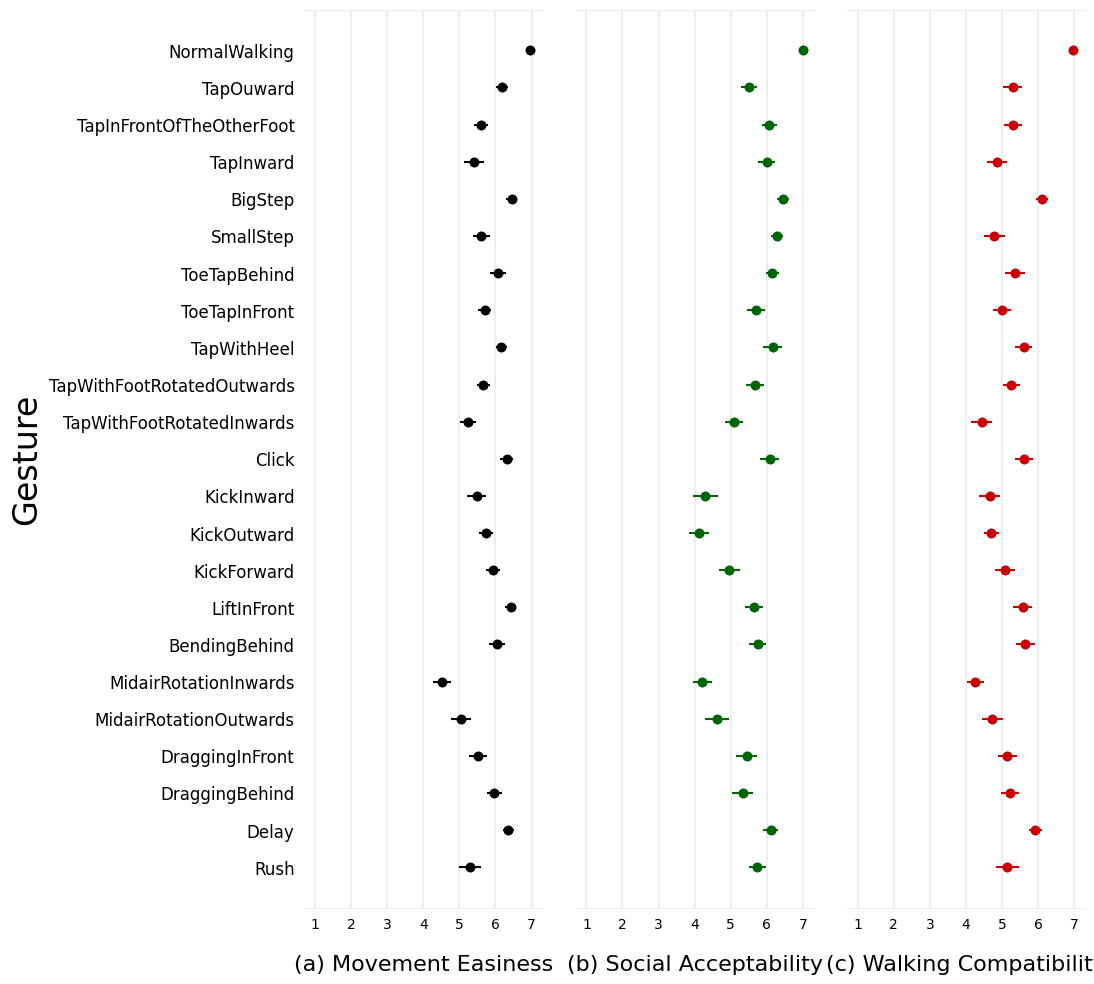

In [8]:
import matplotlib.pyplot as plt

def subplot_subjective_score(names, scores, error, datacolor, subtitle, pole_min, pole_max, xrange, ax, isleftmost):
    hfont = {'fontname':'Helvetica'}
    for i in xrange:
      ax.axvline(x=i, color='#EEEEEE', zorder=0)
    
    # setting xticks to be by integer 
    ax.set_xticks(xrange)

    #ax.set_xticklabels(names)

    #ax.set_xlim([0.5, 7.5])
  
    # setting margin between yticks

    #ax.yaxis.set_tick_params(labelsize=20)
    if isleftmost:
      ax.set_yticks(range(len(names)))
      ax.set_yticklabels(names, size = 12)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=True)
    else: 
      print(subtitle)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=True)
    # plt.ylabel("X-axis", labelpad=0)
    # Control the scale and distance of the y-ticks
    plt.gca().yaxis.set_tick_params(length=0, width=0, direction='out')
    #plt.gca().xaxis.set_tick_params(length=0, width=0, direction='out')

    ax.errorbar(scores, range(len(names)), xerr=error, fmt='o', color=datacolor)
    ax.scatter(scores, range(len(names)))
    # remove left and right border of plot
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_visible(False)

    # set top and bottom border color of plot to grey
    ax.spines['top'].set_color('#EEEEEE')
    ax.spines['bottom'].set_color('#EEEEEE')
    #ax.text(7, 23.5, pole_max, size = 8, ha = 'center')
    #ax.text(1, 23.5, pole_min, size = 8, ha = 'center')
    ax.set_xlabel(subtitle, labelpad=16, size = 16, **hfont)
    if isleftmost:
      ax.set_ylabel("Gesture", size = 24)
    # ax.set_title("Error Rate vs. Score")
    # plt.colorbar()
    plt.rcParams['figure.figsize'] = [8, 9]

fig, ax = plt.subplots(1, 3)
fig.tight_layout(pad = -1)
subplot_subjective_score(names = difficulty_by_gesture.keys(), 
                      scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture], 
                      error = [np.std(difficulty_by_gesture[i]) / np.sqrt(len(difficulty_by_gesture[i])) for i in difficulty_by_gesture],
                      datacolor = "black", subtitle = "(a) Movement Easiness", pole_min = "very difficult", pole_max = "very easy", xrange = range(1, 8), ax = ax[0], isleftmost = True)
subplot_subjective_score(names = social_by_gesture.keys(), 
                      scores = [sum(social_by_gesture[i]) / len(social_by_gesture[i]) for i in social_by_gesture], 
                      error = [np.std(social_by_gesture[i]) / np.sqrt(len(social_by_gesture[i])) for i in social_by_gesture],
                      datacolor = "#006600", subtitle = "(b) Social Acceptability", pole_min = "very\nuncomfortable", pole_max = "very\ncomfortable", xrange = range(1, 8), ax = ax[1], isleftmost = False)
subplot_subjective_score(names = disruption_by_gesture.keys(), 
                      scores = [sum(disruption_by_gesture[i]) / len(disruption_by_gesture[i]) for i in disruption_by_gesture], 
                      error = [np.std(disruption_by_gesture[i]) / np.sqrt(len(disruption_by_gesture[i])) for i in disruption_by_gesture],
                      datacolor = "#cc0000", subtitle = "(c) Walking Compatibility", pole_min = "very much", pole_max = "very little", xrange = range(1, 8), ax = ax[2], isleftmost = False)
# subplot_subjective_score(names = duration_all.keys(), 
#                       scores = [sum(duration_all[i]) / len(duration_all[i]) for i in duration_all], 
#                       error = [np.std(duration_all[i]) / np.sqrt(len(duration_all[i])) for i in duration_all],
#                       datacolor = "#4c72b0", subtitle = "(d) Overall Duration (s)", pole_min = "", pole_max = "", xrange = range(6, 17, 2), ax = ax[3], isleftmost = False)
# subplot_subjective_score(names = duration_t1.keys(), 
#                       scores = [sum(duration_t1[i]) / len(duration_t1[i]) for i in duration_t1], 
#                       error = [np.std(duration_t1[i]) / np.sqrt(len(duration_t1[i])) for i in duration_t1],
#                       datacolor = "#4c72b0", subtitle = "(e) Trial 1 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[4], isleftmost = False)
# subplot_subjective_score(names = duration_t2.keys(), 
#                       scores = [sum(duration_t2[i]) / len(duration_t2[i]) for i in duration_t2], 
#                       error = [np.std(duration_t2[i]) / np.sqrt(len(duration_t2[i])) for i in duration_t2],
#                       datacolor = "#4c72b0", subtitle = "(f) Trial 2 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[5], isleftmost = False)

#plt.figure(facecolor='white')
#plt.show()
plt.savefig("Subjective Score.png", bbox_inches="tight", transparent=True)
